In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
trial_data = pd.read_csv(clinical_trial_data_to_load)
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_data, trial_data, on='Mouse ID', how = 'left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df  = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume_df

# Preview DataFrame
mean_tumor_volume_df=mean_tumor_volume_df.reset_index()
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
#create separate dataframe with needed information
tumor_response = combined_data.loc[:, ["Drug","Timepoint", "Tumor Volume (mm3)"]]
tumor_response

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713
...,...,...,...
1901,Placebo,0,45.000000
1902,Placebo,5,46.588820
1903,Placebo,10,48.018788
1904,Placebo,15,51.161138


In [7]:
#drop unneeded drugs
tumor_response = tumor_response.loc[(tumor_response["Drug"] == "Capomulin")| 
                                    (tumor_response["Drug"] == "Infubinol")|
                                    (tumor_response["Drug"] == "Ketapril")|
                                    (tumor_response["Drug"] == "Placebo")]
tumor_response

,Drug,Timepoint,Tumor Volume (mm3)
380,Ketapril,0,45.000000
381,Ketapril,5,47.864440
382,Ketapril,10,51.236606
383,Ketapril,0,45.000000
384,Ketapril,5,45.824881
...,...,...,...
1901,Placebo,0,45.000000
1902,Placebo,5,46.588820
1903,Placebo,10,48.018788
1904,Placebo,15,51.161138


In [8]:
# Minor Data Munging to Re-Format the Data Frames

mean_tumor_volume_pivot_df = tumor_response.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')[["Capomulin", "Infubinol", "Ketapril","Placebo"]]

# Preview that Reformatting worked

mean_tumor_volume_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [9]:
#group by drug type and timepoint
tumor_response = tumor_response.groupby(["Drug", "Timepoint"])

In [10]:
#tumor volume central tendenacies 
tumor_central = tumor_response.median()
tumor_central = tumor_central.unstack(level = 0)
tumor_central

Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  45.597064  46.877243  47.059664  46.989764
10                 43.421014  49.471244  49.797416  49.109721
15                 42.798160  51.265440  52.246310  51.271314
20                 40.716428  53.862724  54.250054  53.006865
25                 40.224165  55.924633  56.957917  57.106418
30                 39.260371  59.133640  60.296505  59.916934
35                 38.360455  60.722723  62.539154  62.970450
40                 36.843898  63.344283  66.229606  66.287744
45                 37.311846  66.083066  69.872251  69.042841

In [11]:
#format dataframe for plotting
tumor_timepoint = tumor_central.reset_index()
tumor_timepoint.head()

Timepoint Tumor Volume (mm3)                                 
Drug                    Capomulin  Infubinol   Ketapril    Placebo
0            0          45.000000  45.000000  45.000000  45.000000
1            5          45.597064  46.877243  47.059664  46.989764
2           10          43.421014  49.471244  49.797416  49.109721
3           15          42.798160  51.265440  52.246310  51.271314
4           20          40.716428  53.862724  54.250054  53.006865

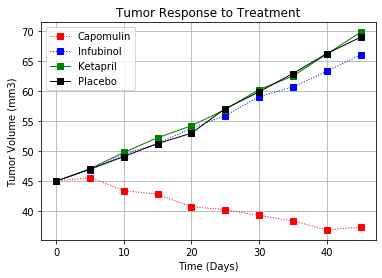

In [12]:
#create plot
cap, = plt.plot(tumor_timepoint["Timepoint"], 
                tumor_timepoint["Tumor Volume (mm3)"]["Capomulin"], linestyle = ":", 
                linewidth= 1 , label= "Capomulin", color = "red", marker = "s")

inf, = plt.plot(tumor_timepoint["Timepoint"], 
                tumor_timepoint["Tumor Volume (mm3)"]["Infubinol"], linestyle = ":", 
                linewidth = 1 ,label = "Infubinol", color = "blue", marker = "s")

ket, = plt.plot(tumor_timepoint["Timepoint"], 
                tumor_timepoint["Tumor Volume (mm3)"]["Ketapril"], linewidth = 1, 
                label = "Ketapril", color = "green", marker = "s")

pla, = plt.plot(tumor_timepoint["Timepoint"], 
                tumor_timepoint["Tumor Volume (mm3)"]["Placebo"], linewidth = 1, 
                label = "Placebo", color = "black", marker = "s")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.legend(handles = [cap,inf,ket,pla], loc = "best")
plt.savefig("../Pymaceuticals/Images/tumor_response.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_df = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_metastatic_df = metastatic_df.mean()
# Convert to DataFrame
meta_response_df = pd.DataFrame(avg_metastatic_df)
# Preview DataFrame
meta_response_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_standard_errors = metastatic_df.sem()

# Convert to DataFrame

metastatic_standard_errors_df = pd.DataFrame(metastatic_standard_errors)


# Preview DataFrame
metastatic_standard_errors_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [15]:
# Minor Data Munging to Re-Format the Data Frames

rows_to_column_met_pivot = meta_response_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
mean_met_site_pivot_df = pd.DataFrame(rows_to_column_met_pivot)


# Preview that Reformatting worked
mean_met_site_pivot_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


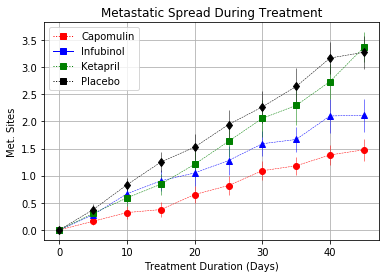

In [25]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_format_list:
    ste = metastatic_standard_errors[drug]
    met_treatment_plt = plt.errorbar(mean_met_site_pivot_df.index,mean_met_site_pivot_df[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)

# Show the Figure

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(True)
plt.legend(handles = [cap,inf,ket,pla], loc = "best")


# Save the Figure
plt.savefig(os.path.join('Images','metastic_spread_during_treatment.png'))

plt.show()

## Survival Rates

In [18]:
#create separate dataframe with needed information
survival_rate = combined_data.loc[:, ["Drug","Timepoint", "Mouse ID"]]

#drop unneeded drugs
survival_rate = survival_rate.loc[(survival_rate["Drug"] == "Capomulin")|
                                  (survival_rate["Drug"] == "Infubinol")|
                                  (survival_rate["Drug"] == "Ketapril")|
                                  (survival_rate["Drug"] == "Placebo")]

#group by drug type and timepoint
survival_rate = survival_rate.groupby(["Drug", "Timepoint"])

#count mouse ids
mouse_count = survival_rate.count()
mouse_count = mouse_count.unstack(level = 0)
mouse_count

Mouse ID                           
Drug      Capomulin Infubinol Ketapril Placebo
Timepoint                                     
0                25        25       25      25
5                25        25       23      24
10               25        21       22      24
15               24        21       19      20
20               23        20       19      19
25               22        18       19      17
30               22        17       18      15
35               22        12       17      14
40               21        10       15      12
45               21         9       11      11

In [19]:
#formate dataframe for plotting
mouse_timepoint = mouse_count.reset_index()
mouse_timepoint.head()

Timepoint  Mouse ID                           
Drug           Capomulin Infubinol Ketapril Placebo
0            0        25        25       25      25
1            5        25        25       23      24
2           10        25        21       22      24
3           15        24        21       19      20
4           20        23        20       19      19

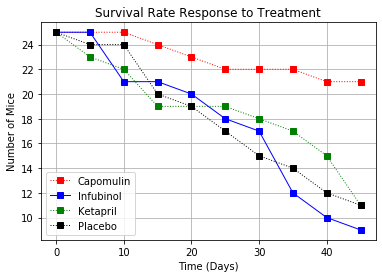

In [20]:
#create plot
cap, = plt.plot(mouse_timepoint["Timepoint"], 
                mouse_timepoint["Mouse ID"]["Capomulin"], linestyle = ":", 
                linewidth = 1,label = "Capomulin", color = "red", marker = "s")

inf, = plt.plot(mouse_timepoint["Timepoint"], mouse_timepoint["Mouse ID"]["Infubinol"],
                linewidth = 1, label = "Infubinol", color = "blue", marker = "s")

ket, = plt.plot(mouse_timepoint["Timepoint"], mouse_timepoint["Mouse ID"]["Ketapril"], 
                linestyle = ":", linewidth = 1, label = "Ketapril", color = "green", marker = "s")

pla, = plt.plot(mouse_timepoint["Timepoint"], mouse_timepoint["Mouse ID"]["Placebo"], 
                linestyle = ":", linewidth = 1, label = "Placebo", color = "black", marker = "s")

plt.title("Survival Rate Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Mice")
plt.grid(True)
plt.legend(handles=[cap,inf,ket,pla], loc = "best")
plt.savefig("../Pymaceuticals/Images/survivor_rate.png")
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
change_tumor_volume_first= mean_tumor_volume_pivot_df.iloc[0,:]
#print(change_tumor_volume_first)
change_tumor_volume_end= mean_tumor_volume_pivot_df.iloc[-1,:]
#print(change_tumor_volume_end)


percentage_change_tumor_volume= ((change_tumor_volume_end-change_tumor_volume_first)/change_tumor_volume_first)*100


# Display the data to confirm
round(percentage_change_tumor_volume,5)

Drug
Capomulin   -19.47530
Infubinol    46.12347
Ketapril     57.02879
Placebo      51.29796
dtype: float64

In [22]:
percentage_change_tumor_volume.index
drug=tuple(percentage_change_tumor_volume.index)

In [23]:
value = list(percentage_change_tumor_volume)
value
value2=[]
[ ]
for x in value:
    number=round(x,2)
    value2.append(number)
value2
value3 =tuple(value2)
value3

(-19.48, 46.12, 57.03, 51.3)

('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
(-19.48, 46.12, 57.03, 51.3)


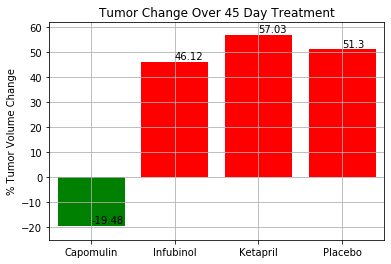

In [24]:
# Store all Relevant Percent Changes into a Tuple
# Helped from TA in order to get the values in the graph

print(drug)
print(value3)


# Splice the data between passing and failing drugs

plt.bar(drug, value3, color=["green","red","red","red"], align="center")


# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in drug]
plt.xticks(tick_locations, drug)
plt.xlim(-0.50, len(drug)-0.50)
plt.ylim(-25, max(value)+5.0)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()


# Use functions to label the percentages of changes
for a,b in zip(drug, value3):
    plt.text(a, b+1, str(b))


# Save the Figure

plt.savefig("../Pymaceuticals/Images/tumor_change.png")
# Show the Figure
plt.show()